In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *
from simplicial_kuramoto.chimera_measures import *
from simplicial_kuramoto.frustration_scan import *

In [143]:


# Plotting the nullspace of L1

def Null_Space_Plot(graph,save=False,folder=''):
    complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)


    KerL1=sc.linalg.null_space(complex_delaunay.L1.todense())

    for i in range(KerL1.shape[1]):
        plt.figure()
        nx.draw_networkx_nodes(graph, pos=points, node_size=5)
        nx.draw_networkx_edges(
                graph,
                pos=points,
                edge_color=KerL1[:,i],
                edge_cmap=plt.get_cmap("bwr"),
                width=5,
                edge_vmin=np.min(KerL1[:,i]),
                edge_vmax=np.max(KerL1[:,i]),
            )
        plt.title('Null space of L1, vector '+str(i))
        if save:
            plt.savefig(folder + 'nullspace_{}.png'.format(i))
        plt.show()


# Ring of rings

In [120]:
def ring_of_rings(num_rings, ring_size):

    G = nx.Graph()
    for i in range(num_rings):
        gc = nx.generators.classic.circulant_graph(ring_size,[1])
        edges = gc.edges()
        for edge in edges:
            edge_ = tuple([(i*ring_size)+x for x in edge])
            G.add_edge(edge_[0],edge_[1], community=i)
        
        G.add_edge(
            i * ring_size + 1, (i + 1) * ring_size % (num_rings * ring_size), community=999,
        )
    return G

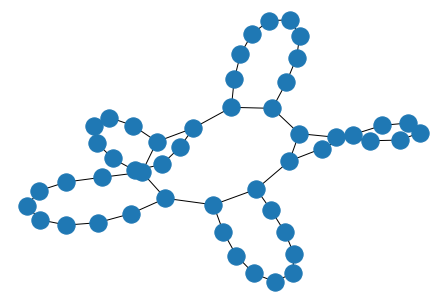

In [155]:

num_rings = 3
ring_size = 10

graph = ring_of_rings(num_rings, ring_size)
points = nx.spring_layout(graph)
nx.draw(graph, pos=points)
plt.savefig('./plots/ring_of_rings_{}_{}.png'.format(num_rings, ring_size))

edge_community_assignment = []
for node1, node2, data in graph.edges.data():
    edge_community_assignment.append(data['community'])
    

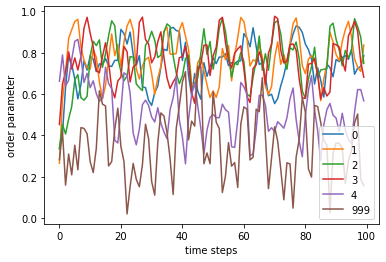

In [159]:
alpha_1 = 1.5
alpha_2 = 1.5

t_max = 100
n_t = 100
labels = dict(((u, v), d) for d, (u, v) in enumerate(graph.edges))

#Null_Space_Plot(graph,save=True,folder='./plots/')

initial_phase = np.random.uniform(0, 2 * np.pi, len(graph.edges))
complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)
KerL1=sc.linalg.null_space(complex_delaunay.L1.todense())

#grad_subspace, curl_subspace, harm_subspace = get_subspaces(complex_delaunay)
edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t, alpha_1=alpha_1, alpha_2=alpha_2)
op=module_order_parameter(edge_result.y,edge_community_assignment)


plt.plot(op[0].T)
plt.ylabel('order parameter')
plt.xlabel('time steps')
plt.legend(np.unique(edge_community_assignment).tolist())
plt.savefig('./plots/ring_of_rings_{}_{}_alpha1{}_alpha2{}_orderparameter.png'.format(num_rings, ring_size,alpha_1, alpha_2))

In [ ]:
gms, chi = shanahan_indices(op[0])
ce = coalition_entropy(op[0], 0.8)

print(gms,chi,ce)

# scan ring of triangles

In [203]:
rings = range(3,10)
ring_size = 3

for i,num_rings in enumerate(rings):
        
    graph = ring_of_rings(num_rings, ring_size)

    edge_community_assignment = []
    for node1, node2, data in graph.edges.data():
        edge_community_assignment.append(data['community'])
            
    alpha_1 = 1.5
    alpha_2 = 1.5

    t_max = 100
    n_t = 100
    labels = dict(((u, v), d) for d, (u, v) in enumerate(graph.edges))

    complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)

    alpha1 = np.linspace(0,np.pi, 5)
    alpha2 = np.linspace(0, np.pi, 5)
    n_repeats = 1

    scan_frustration_parameters(
            complex_delaunay,
            filename="roft_{}_{}.pkl".format(ring_size,num_rings),
            alpha1=alpha1,
            alpha2=alpha2,
            repeats=n_repeats,
            n_workers=2,
        )
    
    
    #edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t, alpha_1=alpha_1, alpha_2=alpha_2)
    #op=module_order_parameter(edge_result.y,edge_community_assignment)

    #plt.figure()
    #plt.plot(op[0].T)
    #plt.ylabel('order parameter')
    #plt.xlabel('time steps')
    #plt.legend(np.unique(edge_community_assignment).tolist())
    #plt.savefig('./plots/ring_of_rings_{}_{}_alpha1{}_alpha2{}_orderparameter.png'.format(num_rings, ring_size,alpha_1, alpha_2))
        
    #gms, chi = shanahan_indices(op[0][:-1,:])
    #ce = coalition_entropy(op[0][:-1,:], 0.8)
        
    #gms_[i] = gms
    #chi_[i] = chi
    #ce_[i] = ce

100%|██████████| 25/25 [19:17<00:00, 46.29s/it]


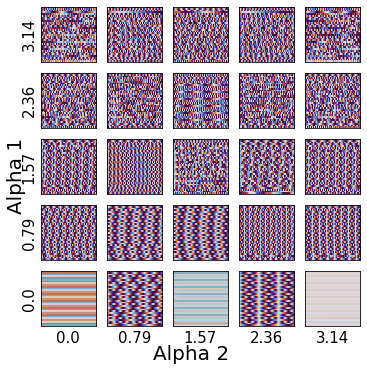

In [212]:
folder = "./results/"

path = folder + "roft_3_8.pkl"
filename = "roft_3_8.pdf"
plot_phases(path, filename)

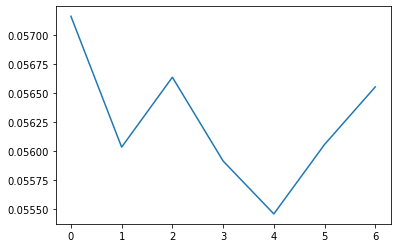

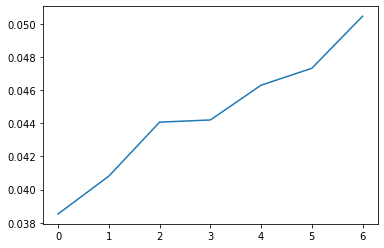

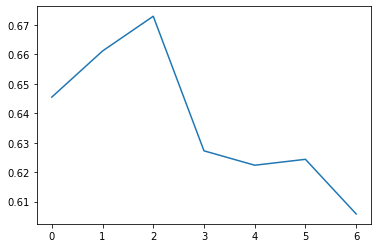

In [201]:
plt.figure();plt.plot(gms_)
plt.figure();plt.plot(chi_)
plt.figure();plt.plot(ce_)


# scan ring of rings

3
3
4
5
6
7
8
9
4
3
4
5
6
7
8
9
5
3
4
5
6
7
8
9


<ipython-input-165-009c98807498>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


6
3
4
5
6
7
8
9
7
3
4
5
6
7
8
9
8
3
4
5
6
7
8
9
9
3
4
5
6
7
8
9


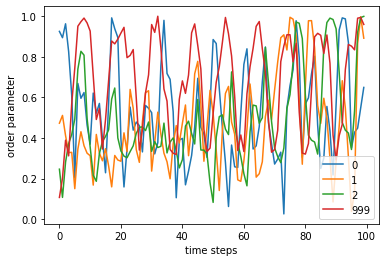

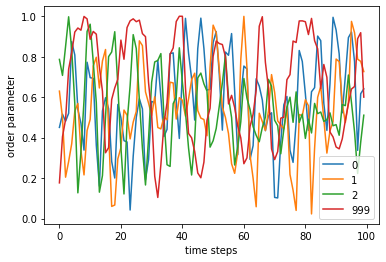

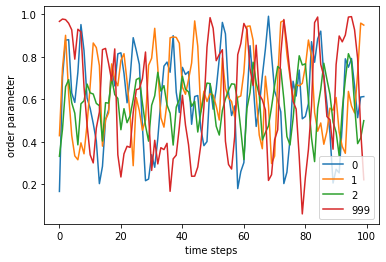

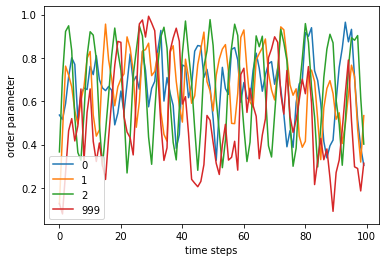

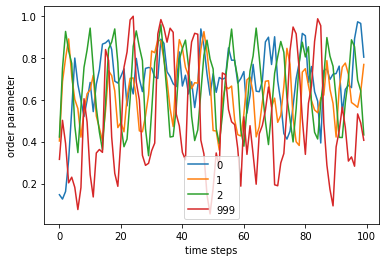

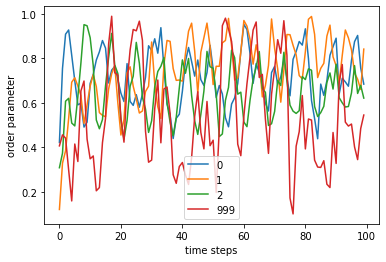

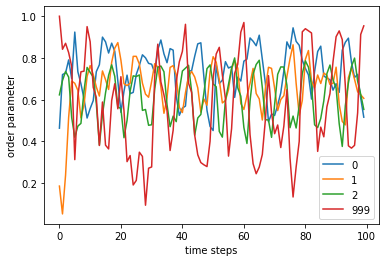

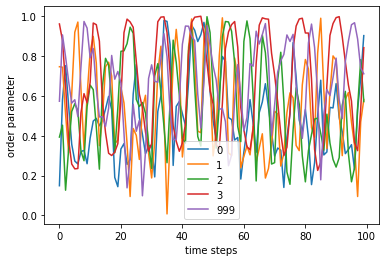

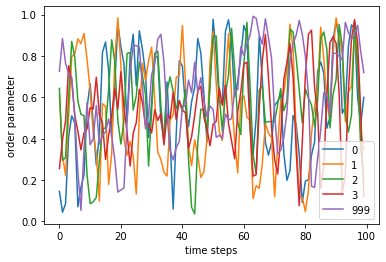

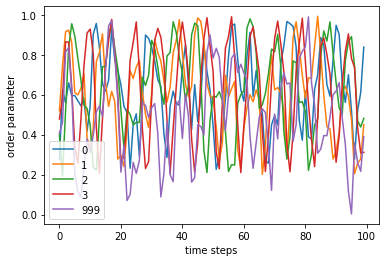

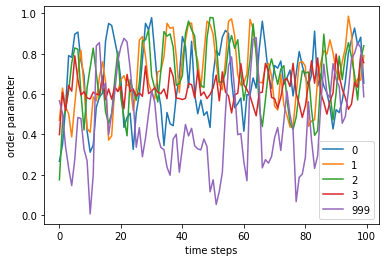

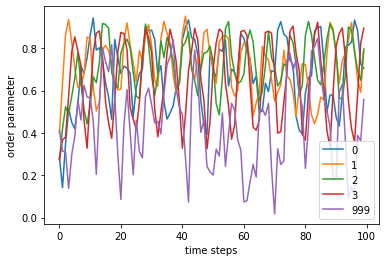

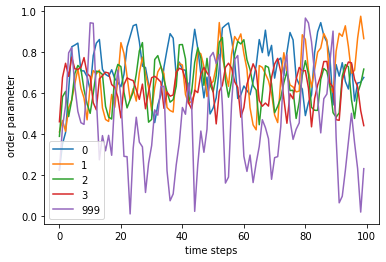

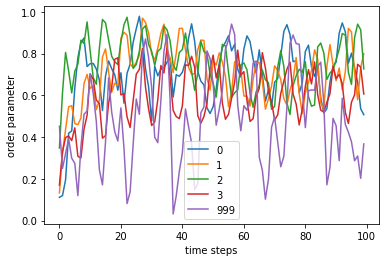

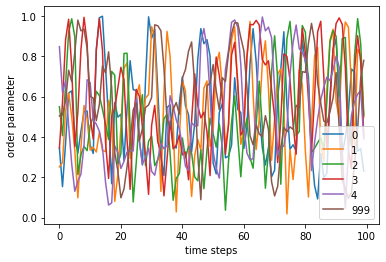

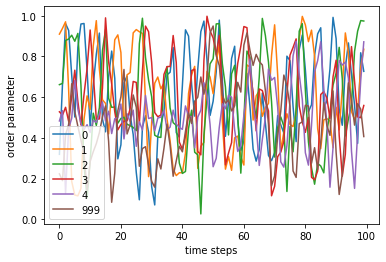

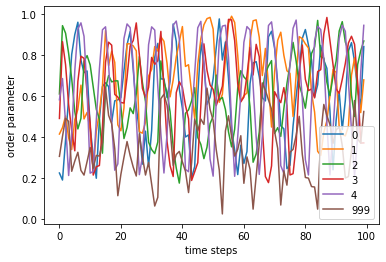

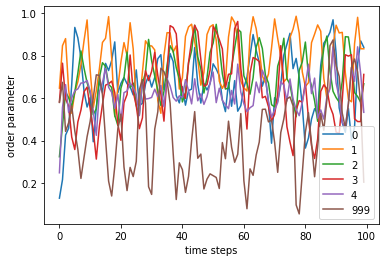

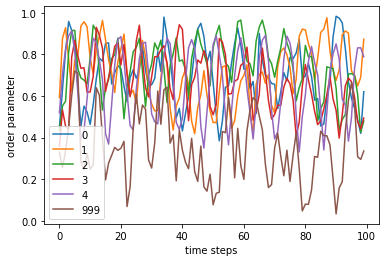

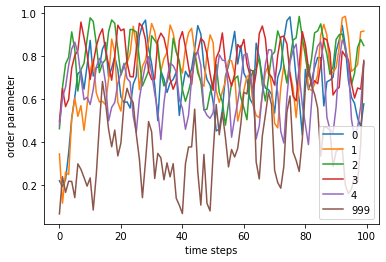

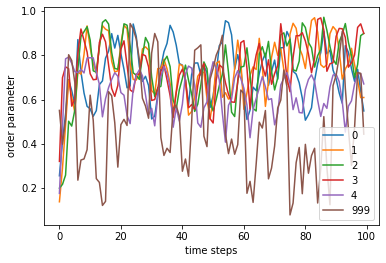

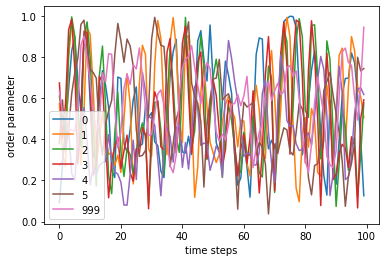

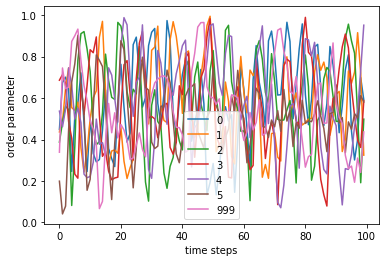

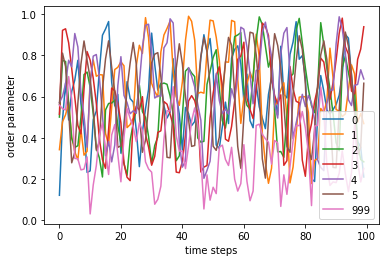

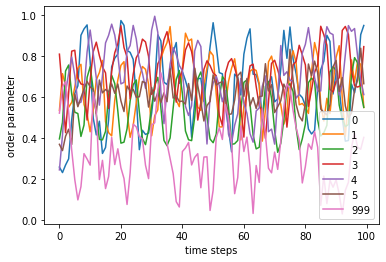

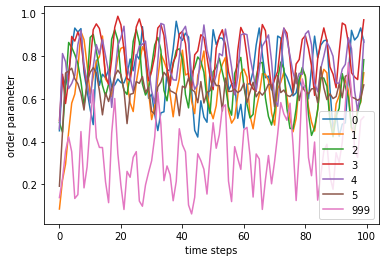

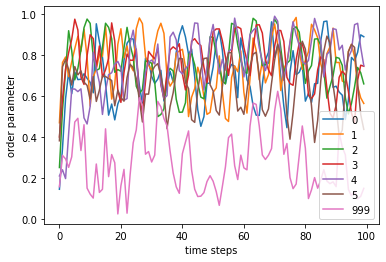

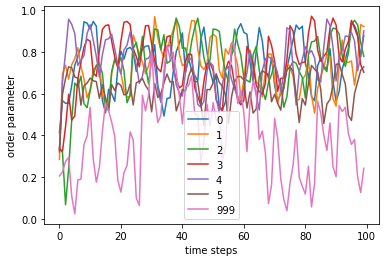

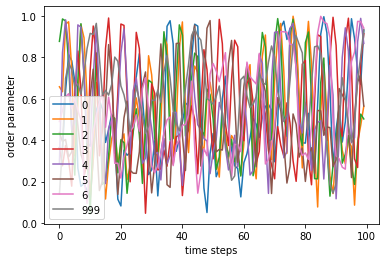

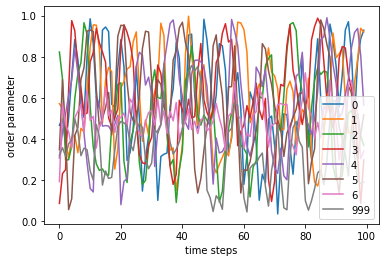

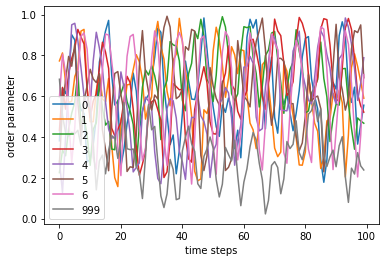

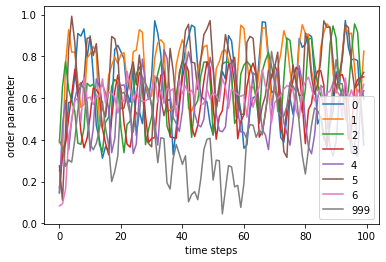

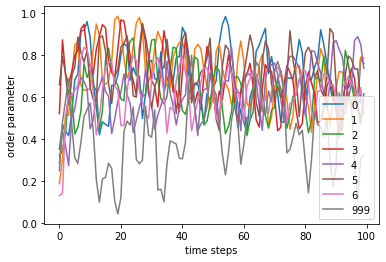

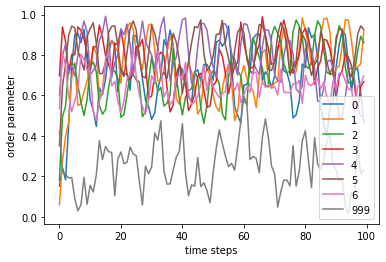

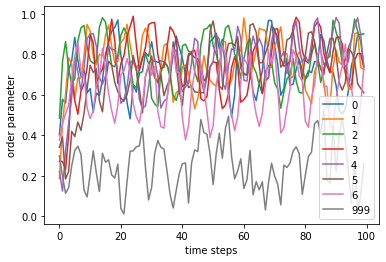

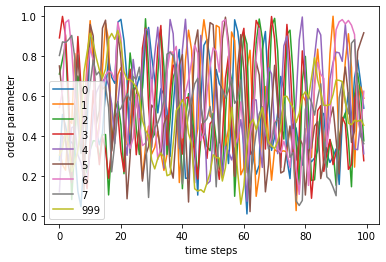

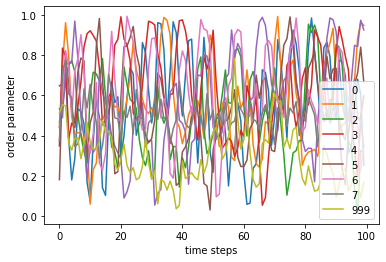

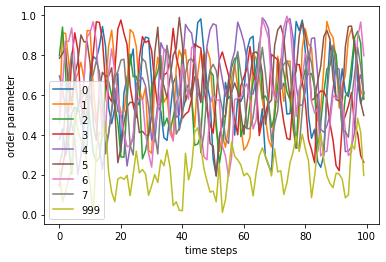

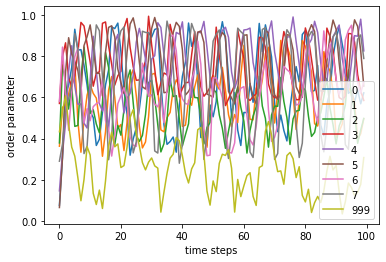

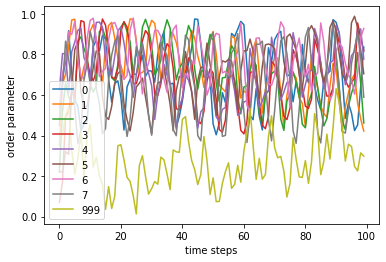

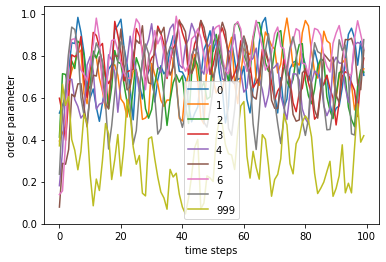

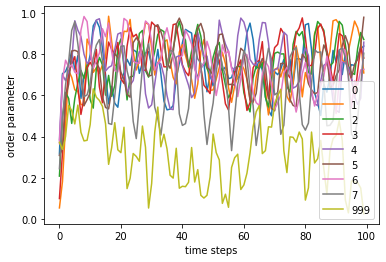

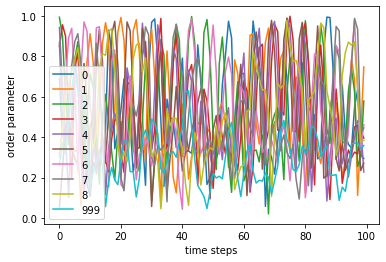

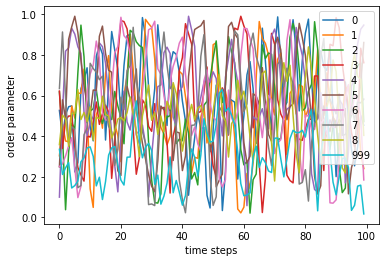

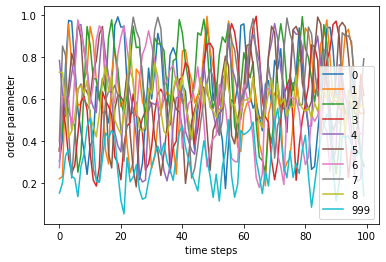

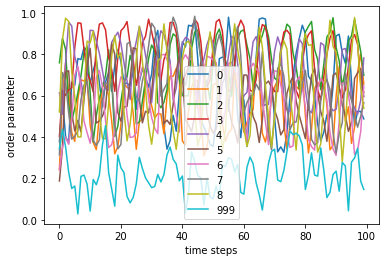

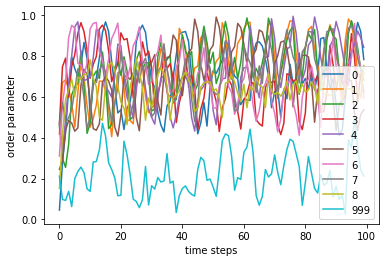

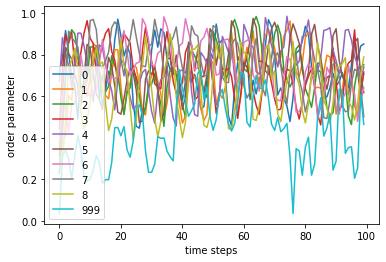

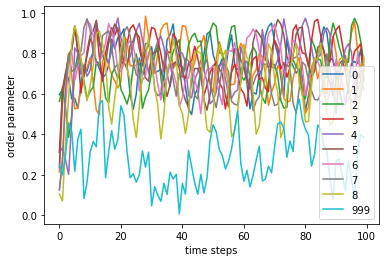

In [165]:
rings = range(3,10)
ring_sizes = range(3,10)

chi_ = np.zeros([10,10])
gms_ = np.zeros([10,10])
ce_ = np.zeros([10,10])

for num_rings in rings:
    print(num_rings)
    for ring_size in ring_sizes:
        print(ring_size)
        
        graph = ring_of_rings(num_rings, ring_size)

        edge_community_assignment = []
        for node1, node2, data in graph.edges.data():
            edge_community_assignment.append(data['community'])
            
        alpha_1 = 1.5
        alpha_2 = 1.5

        t_max = 100
        n_t = 100
        labels = dict(((u, v), d) for d, (u, v) in enumerate(graph.edges))


        initial_phase = np.random.uniform(0, 2 * np.pi, len(graph.edges))
        complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)
        KerL1=sc.linalg.null_space(complex_delaunay.L1.todense())

        edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t, alpha_1=alpha_1, alpha_2=alpha_2)
        op=module_order_parameter(edge_result.y,edge_community_assignment)

        plt.figure()
        plt.plot(op[0].T)
        plt.ylabel('order parameter')
        plt.xlabel('time steps')
        plt.legend(np.unique(edge_community_assignment).tolist())
        plt.savefig('./plots/ring_of_rings_{}_{}_alpha1{}_alpha2{}_orderparameter.png'.format(num_rings, ring_size,alpha_1, alpha_2))
        
        gms, chi = shanahan_indices(op[0])
        ce = coalition_entropy(op[0], 0.8)
        
        gms_[num_rings,ring_size] = gms
        chi_[num_rings,ring_size] = chi
        ce_[num_rings,ring_size] = ce

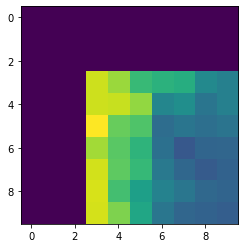

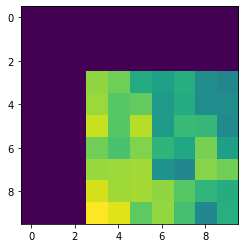

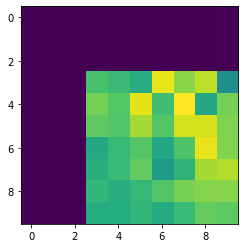

In [169]:
plt.figure();plt.imshow(gms_)
plt.figure();plt.imshow(chi_)
plt.figure();plt.imshow(ce_)

In [173]:
gms_.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.05, 0.05, 0.04, 0.04, 0.04, 0.03, 0.02],
       [0.  , 0.  , 0.  , 0.05, 0.05, 0.05, 0.03, 0.03, 0.02, 0.02],
       [0.  , 0.  , 0.  , 0.06, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , 0.05, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , 0.05, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , 0.05, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , 0.05, 0.05, 0.03, 0.02, 0.02, 0.02, 0.02]])